# Cvičení 07: Odhad regresních koeficientů - Tikhonov, LASSO


In [24]:
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

Nejprve si nagenerujeme data dle modelu
$$
\mathbf{y} = X\boldsymbol{\beta}+\mathbf{e}
$$

<ipython-input-25-52b3d4f482ce>:29: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X),interpolation='none')


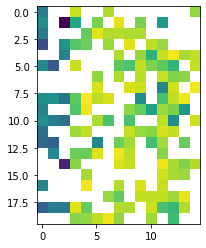

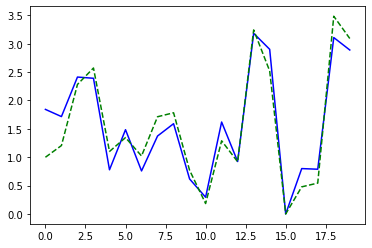

In [25]:
p = 20 ### pocet mereni
n = 15 # pocet regresnich koeficientu

if 1:
    # matice regresnich koeficientu
    X = np.random.randn(p,n)
    ind = X < 0
    X[ind] = 0
    # tento vektor budeme odhadovat
    beta_true = np.array([0,0,0,1,0,0,1,1,1,0,0,0,0,0,0])

    # chceme spatnou podminenost
    ind = [0,1,2]
    X[:,ind] = X[:,ind]/100
    
    # chceme sum
    y = np.transpose(X@beta_true + 0.3*np.random.randn(p)) ### sila sumu je volitelna
    y.shape = (p,1)
    ind2 = y<0
    y[ind2] = 0
    #print(y)
else:
    # data pouzita v prednasce
    X = sio.loadmat("lin_reg_data.mat")["X"]
    y = sio.loadmat("lin_reg_data.mat")["y"]
    beta_true = sio.loadmat("lin_reg_data.mat")["beta_true"]
    #print(y)

plt.imshow(np.log(X),interpolation='none')

#---------------------------------------------
# vykreslete do jednoho grafu mereni a generovana data
#---------------------------------------------
plt.figure()
plt.plot(X@beta_true,color='blue')
plt.plot(y,color='green',linestyle='dashed')

## Obyčejné nejmenší čtverce

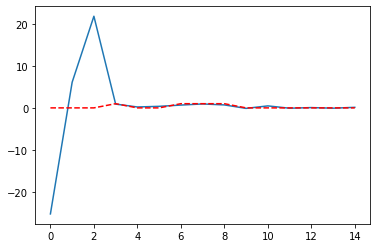

In [26]:
beta_ols = np.zeros(n)
#---------------------------------------------
# spocitejte a vykreslete reseni pomoci nejmensich ctvercu
#---------------------------------------------
beta_ols = np.linalg.inv(X.T@X)@X.T@y

plt.plot(beta_ols)
plt.plot(beta_true,color='red',linestyle='dashed')

## Nejmenší čtverce s Tichonovovou regularizací

$$
\widehat{\beta}_{Tichonov}=\arg\min_{\beta}||\mathbf{y}-X\beta||_{2}^{2}+||(\alpha I)\beta||_{2}^{2},
$$
řešení:
$$
\widehat{\beta}_{Tichonov}=\left(X^{T}X+\alpha^{2}I\right)^{-1}X^{T}\mathbf{y}
$$

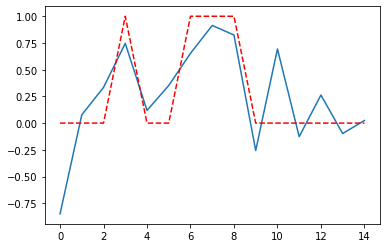

In [27]:
alpha = 1e-2 ### regularizacni koeficient
beta_tich = np.zeros(n)
#---------------------------------------------
# spocitejte a vykreslete reseni pomoci nejmensich ctvercu s Tichonovou regularizaci
#---------------------------------------------
beta_tich = np.linalg.inv(X.T@X + alpha*np.eye(n))@X.T@y

plt.plot(beta_tich)
plt.plot(beta_true,color='red',linestyle='dashed')

### Hledání parametru $\alpha$ pomocí L-křivky
...tedy zobrazení grafu $||\boldsymbol{\beta}||$ vůči $||\mathbf{y}-X\boldsymbol{\beta}||$.

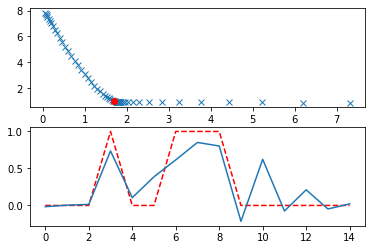

In [28]:
norm_b = []
norm_yXb = []

#---------------------------------------------
# spocitejte pro danny rozsah normy vhodne pro vytvoreni L-krivku
# L-krivku vykreslete a vyberte vhodne alpha
#---------------------------------------------
for i in range(-30,30):
    alpha = np.power(10,i/10)
    beta_tich = np.linalg.inv(X.T@X + alpha*np.eye(n))@X.T@y
    norm_b = np.append(norm_b,np.linalg.norm(beta_tich))
    norm_yXb = np.append(norm_yXb,np.linalg.norm(y - X@beta_tich))

    
plt.subplot(211)
plt.plot(norm_b,norm_yXb,'x')
plt.plot(norm_b[28],norm_yXb[28],'ro')

#---------------------------------------------
# vybrane alpha pouzijte a vysledek vykreslete
#---------------------------------------------
beta_tich_optim = np.linalg.inv(X.T@X + np.power(10,-3/10)*np.eye(n))@X.T@y

plt.subplot(212)
plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_tich_optim)


## Nejmenší čtverce s LASSO regularizací

$$
\widehat{\beta}_{LASSO}=\arg\min_{\beta}||\mathbf{y}-X\beta||_{2}^{2}+\alpha||\beta||_{1}
$$

Zde nemáme pěkný tvar řešení, použijeme řešič z balíku "sklearn".

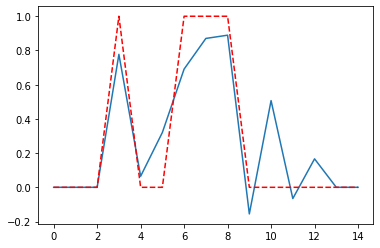

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1e-2)

lasso.fit(X, y)

beta_lasso = lasso.coef_

plt.plot(beta_lasso)
plt.plot(beta_true,color='red',linestyle='dashed')